In [1]:
#predict employee churn:
#churn means quit service or not

In [2]:
#importing basic libraries
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#sampling technique
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#first load dataset
df=pd.read_csv("/content/drive/MyDrive/ML Case_Study/employee_data.csv")
#df =pd.read_csv(r"path") r: means carriage return
#to show first five records from dataset
df.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#chceking no. of columns and no. of rows
df.shape

(11582, 10)

In [7]:
df["quit"].unique()

array([1, 0])

In [8]:
#output column have categorical data so we go for classification


In [9]:
#chcek the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    1
department               1
salary                   1
dtype: int64

In [10]:
#chceking the datatypes of each columns in given dataset
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

In [11]:
#chceking mean and median value to understand if there is outlilers or nit
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11581.000000
mean,0.628308,0.716608,3.802884,200.523053,3.305215,0.152651,0.172682,0.013816
std,0.241985,0.168828,1.169843,48.839268,1.209369,0.359666,0.377988,0.116731
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Starting EDA on dataset

In [12]:
#fillling null values on columns
a=df["promotion_last_5years"].value_counts()
print(a)
df["promotion_last_5years"].fillna(0.0,inplace=True)

0.0    11421
1.0      160
Name: promotion_last_5years, dtype: int64


In [13]:
#chcek the null values again
#convert data type of nor losses col from obj to float permenently
df["promotion_last_5years"]=df["promotion_last_5years"].astype("int")
df.dtypes
#df.isnull().sum()

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [14]:
#checking frequency to null values in object type data
df["department"].value_counts()
df["department"].fillna("sales",inplace=True)
#chcek the null values again
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   1
dtype: int64

In [15]:
#checking frequency to null values in object type data
df["salary"].value_counts()
df["salary"].fillna("low",inplace=True)
#chcek the null values again
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

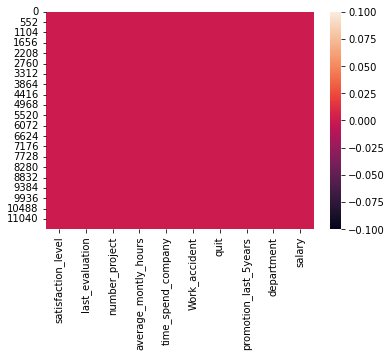

In [16]:
#visualize the null values 
sb.heatmap(df.isnull())
plt.show()

In [17]:
#chcek duplicate values
df.duplicated().sum()

9

In [18]:
#drop the duplicated values
df.drop_duplicates(inplace=True)

In [19]:
#chcek duplicate values again
df.duplicated().sum()

0

In [20]:
#chcek if data is balan(ced or not
df["quit"].value_counts()

0    9582
1    1991
Name: quit, dtype: int64

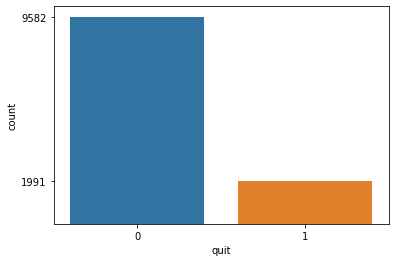

In [21]:
#output column has categorical data so we will go for classification algorithms
#to see visually
sb.countplot(data=df,x="quit")
f=df["quit"].value_counts()
plt.yticks(f)
plt.show()

In [22]:
#data is unbalanced 
#splitting the data 
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])
df_num.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [23]:
#apply LabelEncoder on df_cat
from sklearn.preprocessing import LabelEncoder
columns=df_cat.columns
for col in columns:
  #create object
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])


In [24]:
df_cat.head()

,department,salary
0,7,1
1,7,2
2,7,2
3,7,1
4,7,1


In [25]:
#concatenate df_cat and df_num
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [26]:
#splitting input and output
x=df_new.drop("quit",axis=1)
y=df["quit"]

In [27]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8101, 9), (3472, 9), (8101,), (3472,))

In [29]:
#we need to balance it using RandomOverSampler 
#!pip install imblearn use this if requirement is not already satisfied

In [30]:
#first randonoversampler
from imblearn.over_sampling import RandomOverSampler

In [31]:
x_train.shape,y_train.shape

((8101, 9), (8101,))

In [32]:
#from sklearn.preprocessing import StandardScaler
#creating object for StandardScaler class
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [33]:
#to convert minority class into majority class
#use RandomOverSampler
ros=RandomOverSampler(random_state=1)

In [34]:
#apply oversampler on training data
x_trainros,y_trainros=ros.fit_resample(x_train,y_train)

In [35]:
y_trainros.value_counts()

1    6738
0    6738
Name: quit, dtype: int64

In [36]:
x_trainros.shape,y_trainros.shape

((13476, 9), (13476,))

In [37]:
#also apply oversampler on testing data
x_testros,y_testros=ros.fit_resample(x_test,y_test)

In [38]:
#create function
def create_model(model):
    #train the model with70% data
    model.fit(x_trainros,y_trainros)
    # test the model with 30% data
    y_pred=model.predict(x_testros)
    #genrate thye report
    print(classification_report(y_testros,y_pred))
    print(confusion_matrix(y_testros,y_pred))
    return model

#import libraries
from sklearn.metrics import classification_report,confusion_matrix


# Logistic Regreesion

In [39]:
#apply logistic algorithm
#import LogisticRagresion
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
#call the function
lor=create_model(lor)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2844
           1       0.78      0.79      0.79      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688

[[2213  631]
 [ 596 2248]]


# Decision Tree(GINI)

In [40]:
#apply decision tree aglorithm for gini index
#perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#to create an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method


In [41]:
#call the function 
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.98      0.92      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2784   60]
 [ 216 2628]]


In [42]:
#to see imp features ,menas IG of each input 
dt.feature_importances_

array([0.43820738, 0.10394971, 0.03588649, 0.06751939, 0.3360422 ,
       0.00158612, 0.        , 0.01583505, 0.00097367])

In [43]:
dict={'Input':x.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1

,Input,IG
0,satisfaction_level,0.438207
1,last_evaluation,0.103950
2,number_project,0.035886
3,average_montly_hours,0.067519
4,time_spend_company,0.336042
5,Work_accident,0.001586
6,promotion_last_5years,0.000000
7,department,0.015835
8,salary,0.000974


In [44]:
#to arrange records in desc -> highest to lowest 
df9=df1.sort_values('IG',ascending=False,ignore_index=True)
df9

,Input,IG
0,satisfaction_level,0.438207
1,time_spend_company,0.336042
2,last_evaluation,0.103950
3,average_montly_hours,0.067519
4,number_project,0.035886
5,department,0.015835
6,Work_accident,0.001586
7,salary,0.000974
8,promotion_last_5years,0.000000


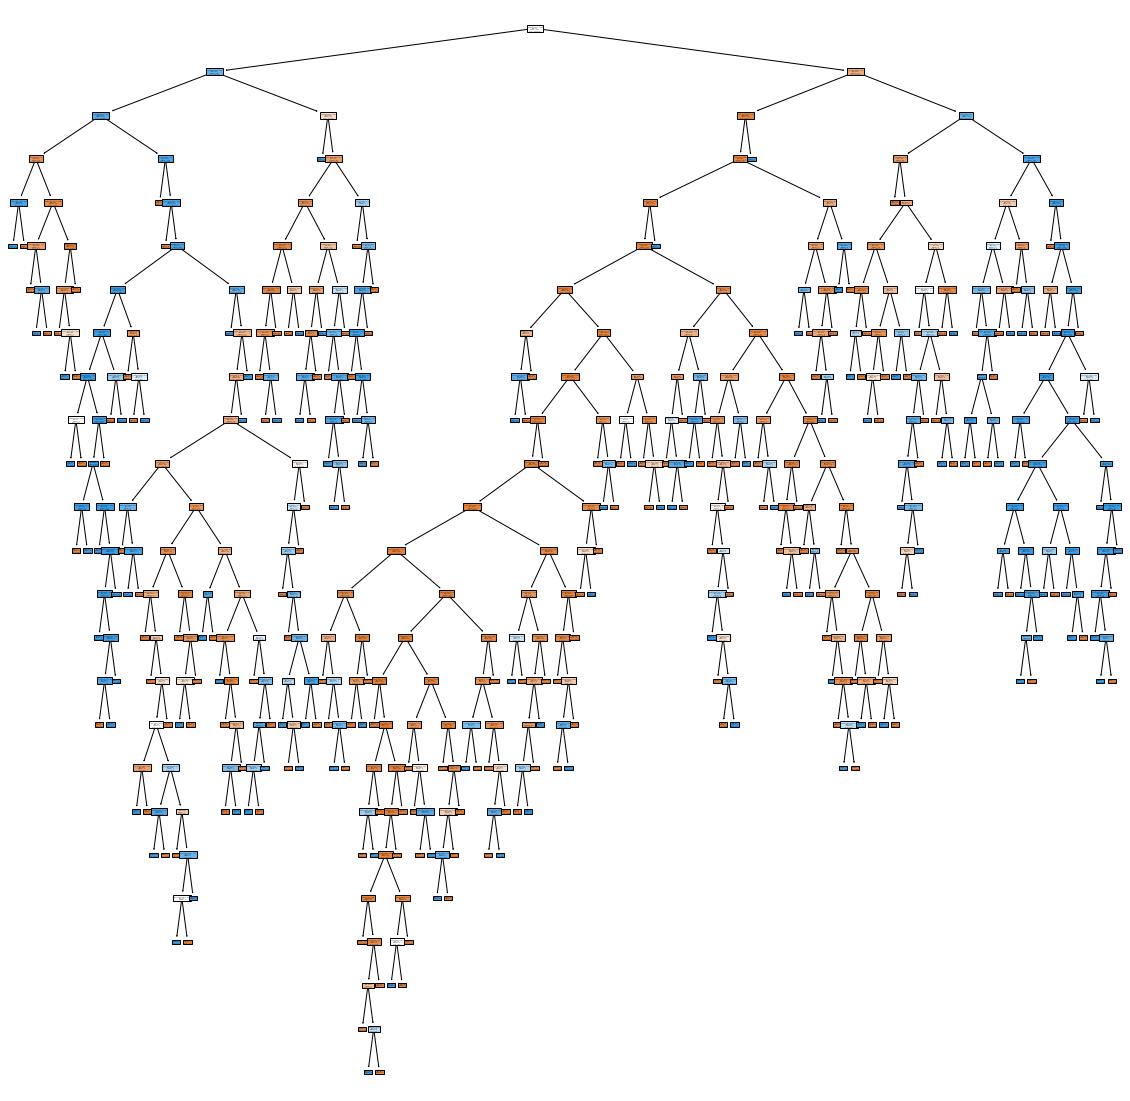

In [45]:
#create a tree
from sklearn import tree
features=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# Decision Tree (max_depth,gini)

In [46]:
#apply pruning technique for DTC using gini
#max_depth<=8
'''
for i in range(1,9):
    dt=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("max_depth0:",i)
    #call the function
    dt=create_model(dt)
'''
dt1=DecisionTreeClassifier(random_state=1,max_depth=3)
# call function
dt1=create_model(dt1)




              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2844
           1       0.91      0.94      0.92      2844

    accuracy                           0.92      5688
   macro avg       0.92      0.92      0.92      5688
weighted avg       0.92      0.92      0.92      5688

[[2576  268]
 [ 184 2660]]


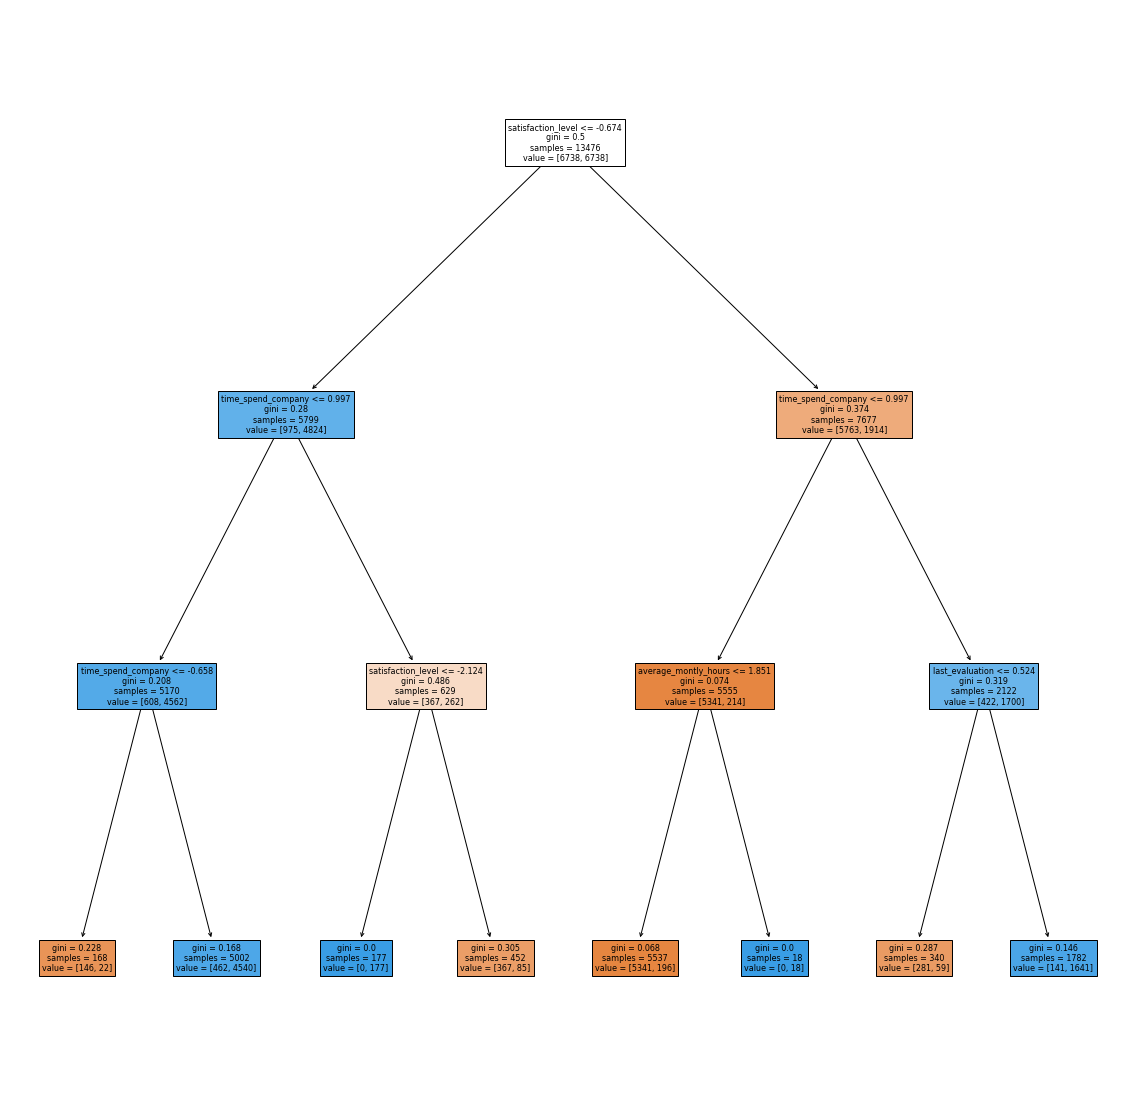

In [47]:
#create a tree
from sklearn import tree
features=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

# Decision Tree (min_samples_leaf,gini)

In [48]:
#1. min_samples
#create object of DecisionTreeClassifier class and pass the arguments
'''
for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min samples leaf:",i)
    #call the function 
    dt2=create_model(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call the function 
dt2=create_model(dt2)



              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.97      0.93      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2776   68]
 [ 205 2639]]


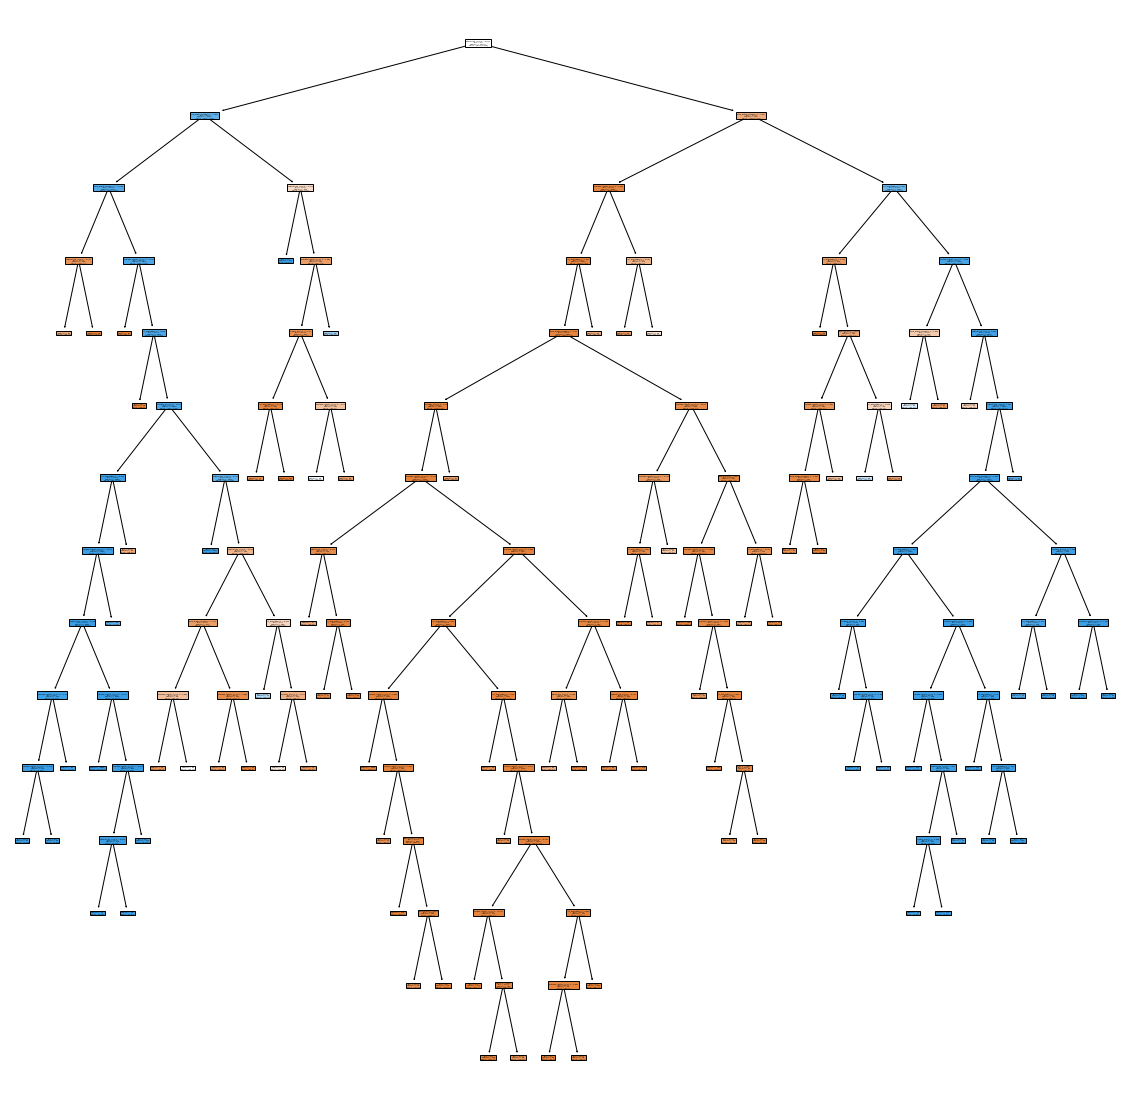

In [49]:
#create a tree
from sklearn import tree
features=x.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [50]:

#conclusion : 
#Decision Tree Classifier with GINI Index :   1:0.92 anf 0 - 0.98
#applied Pruning Tech : 1. max_depth with GINI INDEX then got 
#Accurancy  1: 0.94   and 0 : 0.91  and max_depth=3
#but applied pruning tech. 2. min_samples_leaf with GINI INDEX then got 
#Accurancy  1: 0.93   and 0 : 0.98  and min_samples_leaf=45

# Decision Tree(entropy)

In [51]:
#apply decision tree aglorithm for entropy index
#use entropy method:-p(yes)* log(p(yes))-Q(no)*log(Q(no))
#first create object for DecisionTreeClassifier class and 
#passing the parameter criterion ="entropy" by deafalut criterion="gini index" if didnpt give
dt=DecisionTreeClassifier(random_state=1,criterion="entropy")
#not apply pruning technique

#call the function 
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.98      0.92      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2796   48]
 [ 225 2619]]


# Decision Tree (max_depth,entropy)

In [52]:
#apply pruning technique for DTC using entropy
#max_depth<=8
'''
for i in range(1,9):
    dt=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=i)
    print("max_depth0:",i)
    #call the function
    dt=create_model(dt)
'''

dt=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=2)
#call the function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2844
           1       0.82      0.96      0.88      2844

    accuracy                           0.87      5688
   macro avg       0.88      0.87      0.87      5688
weighted avg       0.88      0.87      0.87      5688

[[2243  601]
 [ 119 2725]]


# Decision Tree (min_samples_leaf,entropy)

In [53]:
#apply 2nd pruning technique min_samples_leaf
'''
for i in range(45,101):
    dt=DecisionTreeClassifier(random_state=1,criterion="entropy",min_samples_leaf=i)
    print("min_samples_leaf:",i)
    #call the function
    dt=create_model(dt)
'''
dt=DecisionTreeClassifier(random_state=1,criterion="entropy",min_samples_leaf=45)
#call the function
dt=create_model(dt)


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2844
           1       0.97      0.94      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2752   92]
 [ 184 2660]]


In [54]:
#conclusion : 
#Decision Tree Classifier with entropy Index :   1-0.92 and 0 - 0.98
#applied Pruning Tech : 1. max_depth with entropy then got 
#Accurancy  1: 0.96   and 0 : 0.79 and max_depth=2
#but applied pruning tech. 2. min_samples_leaf with entropy then got 
#Accurancy  1: 0.93   and 0 : 0.97  and min_samples_leaf=45


In [55]:
#checking features
x.shape

(11573, 9)

# Rabdom Forest (gini and enotropy)

In [56]:
#ENSEMBLING TECHNIQUE: RANDOM FOREST TREE
#call random forest tree from package use gini index

from sklearn.ensemble import RandomForestClassifier

#create a object of RandomForestClassifier class()
rfc=RandomForestClassifier(n_estimators=10,max_features=1,random_state=1)
#estimators means how many decisiontreeclassifiers min=10 ,max=100
#max_features means take how many inputs
#bydefalut it took GINI INDEX


#call the function    
rfc=create_model(rfc)
'''


for i in range(6,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)

'''


              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2844
           1       0.99      0.91      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.96      0.95      0.95      5688
weighted avg       0.96      0.95      0.95      5688

[[2824   20]
 [ 251 2593]]


'\n\n\nfor i in range(6,0,-1):\n    #create object for RandomForestClassifier class\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)\n    print("no of features:",i)\n    #call the function\n    rfc=create_model(rfc)\n\n'

In [57]:
# use entropy
'''
for i in range(6,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion="entropy")
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)
'''
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1,criterion="entropy")
#call the function
rfc=create_model(rfc)




              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2844
           1       1.00      0.92      0.96      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688

[[2834   10]
 [ 224 2620]]


In [58]:
#random forest  with gini Index :   1-0.91 and 0 - 0.99 fe=1
# random forest with entropy Index :  1-0.91 and 0 - 0.99 fe=1


# ADA boosting - Adapter boosting

In [59]:
#USE BOOSTING TECHNIQUE:
#apply ADA bost on given dataset
from sklearn.ensemble import AdaBoostClassifier

In [60]:
#create the object AdaBoostClassifier class#by deafalut gini index

ada=AdaBoostClassifier(n_estimators=5,random_state=1)
#call the function
ada=create_model(ada)
#n_estimators means no. of decision stump can be <=100_estimators can be <=100

'''

for i in range(1,7):
    #create object for RandomForestClassifier class
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    ada=create_model(ada)

'''

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2844
           1       0.88      0.95      0.91      2844

    accuracy                           0.91      5688
   macro avg       0.91      0.91      0.91      5688
weighted avg       0.91      0.91      0.91      5688

[[2472  372]
 [ 152 2692]]


'\n\nfor i in range(1,7):\n    #create object for RandomForestClassifier class\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("no of descision stump:",i)\n    #call the function\n    ada=create_model(ada)\n\n'

In [61]:
#conclusion :#adaboosting  recall score :   1-0.95 and 0 - 0.87 on decision stump:5

# Gradient Boosting

In [62]:
#Gradient Boosting :
#apply gradient Boost technuique on bank dataset
from sklearn.ensemble import GradientBoostingClassifier
#create the object GradientBoostClassifier class#by deafalut gini index


gbc=GradientBoostingClassifier(n_estimators=10,random_state=1)
#n_estimators means no. of iteration of decision stump can be <=100_estimators can be <=100
#call the function
gbc=create_model(gbc)
'''
for i in range(10,101):
    #create object for RandomForestClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    gbc=create_model(gbc)
'''

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2844
           1       0.92      0.94      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688

[[2611  233]
 [ 182 2662]]


'\nfor i in range(10,101):\n    #create object for RandomForestClassifier class\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print("no of descision stump:",i)\n    #call the function\n    gbc=create_model(gbc)\n'

In [63]:
#conclusion :#gradientboosting  recall score :   1-0.94 and 0 - 0.92 on decision stump:10

# Extreme Gradient Boosting (XGB)

In [64]:
#Extreme Gradient Boosting(XGB)
#!pip install xgboost
#call 
from xgboost import XGBClassifier

In [65]:
#create object for XGBClassifier class

xgc=XGBClassifier(n_estimators=10,reg_alpha=10,random_state=1)
#automatic overftting : reg means regualrization  and alpha or lambda:
#hyperpermater
#n_estimators means no. of iteration of decision stump can be <=100_estimators can be <=100
#call the function
xgc=create_model(xgc)

'''
for i in range(10,101):
    #create object for RandomForestClassifier class
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("no of descision stump:",i)
    #call the function
    xgc=create_model(xgc)
'''


              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2844
           1       0.96      0.92      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688

[[2738  106]
 [ 217 2627]]


'\nfor i in range(10,101):\n    #create object for RandomForestClassifier class\n    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)\n    print("no of descision stump:",i)\n    #call the function\n    xgc=create_model(xgc)\n'

In [66]:
#conclusion :# extreme gradientboosting  recall score :   1-0.93 and 0 - 0.97 on decision stump:10

# Support Vector Machine (SVM)

In [67]:
#Apply Support Vector Machine (SVM)
#1. Linear Separable data means Linear Kernal
#call inbuilt class 
from sklearn.svm import LinearSVC
#LinearSVC means Linear support vector classifier

In [68]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1) #bydefault hard margin , suppose no
#outlier in my dataset means suppose no overfit 
#svc user defined object

In [69]:
#call function 
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2844
           1       0.77      0.78      0.78      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688

[[2193  651]
 [ 627 2217]]


In [70]:
#create object of LinearSVC class and add some external error 
svc1=LinearSVC(random_state=1,C=0.9) #soft margin

#here C is parameter which is used to add some error during training time 
#set range of error 0.001 to 1 means C<=1

In [71]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2844
           1       0.77      0.78      0.78      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688

[[2193  651]
 [ 627 2217]]


In [72]:
#data is not linear cause even after adding external errors nothing happened

In [73]:
#polynomial kernel function
#use ibuilt class SVC(support vector classifier)
from sklearn.svm import SVC
#SVC is used for polynomial and radial basis kernel function: both are used for non-linear data

In [74]:
#create object for  SVC class and passing the poly in kernel parameter
svc1= SVC(random_state=1,kernel="poly")

In [75]:
#call function 
svc1=create_model(svc1)


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2844
           1       0.95      0.93      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688

[[2714  130]
 [ 203 2641]]


In [76]:
#radial kernel function
#create object for  SVC class and passing the radial basis in kernel parameter
svc2= SVC(random_state=1,kernel="rbf")
#call function 
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2844
           1       0.96      0.93      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688

[[2732  112]
 [ 209 2635]]


# KNN

In [77]:
#KNN ALGORITHM
df9

,Input,IG
0,satisfaction_level,0.438207
1,time_spend_company,0.336042
2,last_evaluation,0.103950
3,average_montly_hours,0.067519
4,number_project,0.035886
5,department,0.015835
6,Work_accident,0.001586
7,salary,0.000974
8,promotion_last_5years,0.000000


In [78]:
#important features : input (estimatedsalary and Age)
#select input and ouput
x=df[["time_spend_company","average_montly_hours","number_project"]]
y=df["quit"]

In [79]:
# spliting the data of x and y using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [80]:
#first apply standardscaler
from sklearn.preprocessing import StandardScaler
#create object for StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [81]:
#give data to knn algorithm
from sklearn.neighbors import KNeighborsClassifier
#create object for KNeighboursClassifier class
knc=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5

In [82]:
#call function 
knc=create_model(knc)
#at n_neighbors=5 it shows 1=0.92 and 0=0.91
#thats why we used at n_neighbors=7 it shows 1=0.93 and 0=0.90

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2844
           1       0.92      0.93      0.92      2844

    accuracy                           0.92      5688
   macro avg       0.92      0.92      0.92      5688
weighted avg       0.92      0.92      0.92      5688

[[2620  224]
 [ 205 2639]]


# Final Conclusion

In [83]:
#so far best one decision tree enotropy with prunning max_depth recall 0=0.79 and 1=0.96